# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

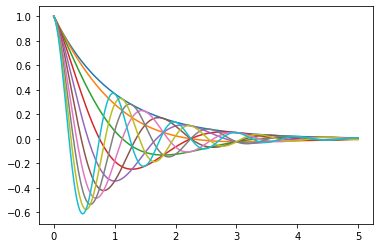

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, ax = plt.subplots()
x1 = np.linspace(0, 2, 10)
x = np.linspace(0, 5, 200)

for i in x1:
    y = np.cos(np.pi * i * x) * np.exp(-x)
    ax.plot(x, y)

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/tennis.csv')
df

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False
4,1998,"Geneva, Switzerland",1998-08-24,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",S,...,6.0,16.0,21.0,95.0,141.0,51.0,135.0,146.0,276.0,False
1175,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R32,...,0.0,0.0,8.0,22.0,45.0,9.0,41.0,31.0,86.0,True
1176,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R16,...,0.0,2.0,9.0,28.0,50.0,11.0,49.0,39.0,99.0,True
1177,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",Q,...,4.0,9.0,16.0,47.0,78.0,34.0,95.0,81.0,173.0,True


In [3]:
df['dftpt'] = df['player1 double faults'] / df['player1 total points total']
df

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win,dftpt
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False,0.019417
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True,0.000000
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True,0.020270
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False,0.046154
4,1998,"Geneva, Switzerland",1998-08-24,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",S,...,16.0,21.0,95.0,141.0,51.0,135.0,146.0,276.0,False,0.018116
1175,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R32,...,0.0,8.0,22.0,45.0,9.0,41.0,31.0,86.0,True,0.000000
1176,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R16,...,2.0,9.0,28.0,50.0,11.0,49.0,39.0,99.0,True,0.000000
1177,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",Q,...,9.0,16.0,47.0,78.0,34.0,95.0,81.0,173.0,True,0.011561


Text(0, 0.5, 'Double fault ratio')

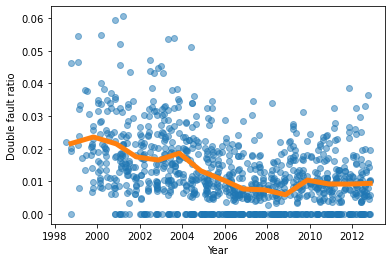

In [4]:
year_start = df.groupby('year')['start date'].max()
year_ratio = df.groupby('year')['dftpt'].mean()
fig, ax = plt.subplots()
ax.plot_date(pd.to_datetime(df['start date']), df['dftpt'], alpha = 0.5)
ax.plot_date(pd.to_datetime(year_start), year_ratio, '-', lw = 5)
plt.xlabel('Year')
plt.ylabel('Double fault ratio')

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


In [7]:
import pandas as pd
import datetime as dt
!pip install --upgrade pandas-datareader
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()
    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
ticker

Requirement already up-to-date: pandas-datareader in /Users/mike_stein612/opt/anaconda3/lib/python3.8/site-packages (0.9.0)


,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SNE,PTR
Date,,,,,,,,,,,,,
2019-01-02,47.080002,101.120003,115.209999,47.860001,116.279999,39.480000,1539.130005,323.809998,57.400002,46.930000,1045.849976,48.720001,60.910000
2019-01-03,44.490002,97.400002,112.910004,46.389999,114.650002,35.547501,1500.280029,310.899994,55.700001,46.639999,1016.059998,47.020000,61.150002
2019-01-04,47.220001,101.930000,117.320000,49.220001,119.730003,37.064999,1575.390015,327.079987,56.599998,47.570000,1070.709961,49.209999,62.810001
2019-01-07,47.439999,102.059998,118.150002,49.480000,121.279999,36.982498,1629.510010,328.109985,56.439999,46.950001,1068.390015,49.720001,62.549999
2019-01-08,47.740002,102.800003,119.830002,49.330002,122.309998,37.687500,1656.579956,340.529999,55.950001,47.480000,1076.280029,49.889999,63.889999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,59.410000,157.380005,134.979996,54.459999,141.339996,71.067497,1789.209961,333.000000,88.769997,54.709999,1343.560059,67.760002,49.099998
2019-12-26,59.820000,158.669998,134.910004,54.810001,141.529999,72.477501,1868.770020,329.920013,88.400002,55.020000,1360.400024,68.019997,49.660000
2019-12-27,60.080002,158.960007,135.270004,54.930000,141.279999,72.449997,1869.800049,330.140015,88.800003,55.349998,1351.890015,67.779999,50.060001


In [8]:
first = ticker.iloc[0]
last = ticker.iloc[-1]

pct_change = (last - first) / first * 100
pct_change

INTC    27.124036
MSFT    55.953316
IBM     16.344062
BHP     14.312575
TM      20.863429
AAPL    85.948580
AMZN    20.057432
BA       0.602209
QCOM    53.710803
KO      17.941611
GOOG    27.840517
SNE     39.573067
PTR    -17.369887
dtype: float64

<BarContainer object of 13 artists>

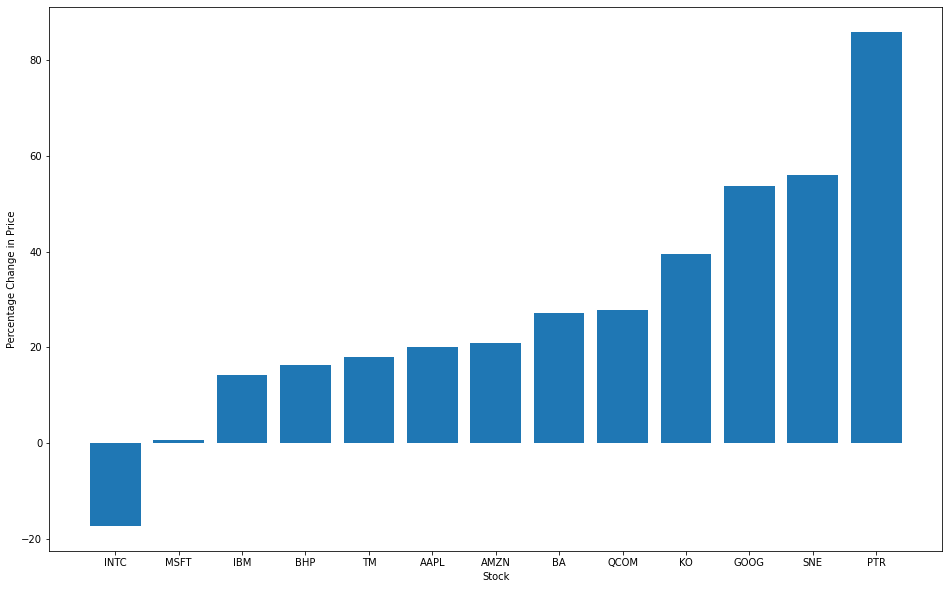

In [10]:
pct_change = pct_change.sort_values()
x = range(len(ticker_list))

fig, ax = plt.subplots(figsize = (16, 10))
ax = plt.bar(x, height = pct_change)
plt.xlabel('Stock')
plt.ylabel('Percentage Change in Price')
p = list(range(13))
plt.xticks(p, ticker.columns)

ax

# Exercise 4

Using the method `read_data` introduced in Exercise 3, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

In [11]:
import pandas as pd
import datetime as dt
!pip install --upgrade pandas-datareader
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np

indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

def read_data(indices_list,
          start=dt.datetime(1900, 1, 2),
          end=dt.datetime(2020, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    df = pd.DataFrame()
    for ind in indices_list:
        prices = data.DataReader(ind, 'yahoo', start, end)
        closing_prices = prices['Close']
        df[ind] = closing_prices

    return df

df = read_data(indices_list)
df

Requirement already up-to-date: pandas-datareader in /Users/mike_stein612/opt/anaconda3/lib/python3.8/site-packages (0.9.0)


,^GSPC,^IXIC,^DJI,^N225
Date,,,,
1927-12-30,17.660000,NaN,NaN,NaN
1928-01-03,17.760000,NaN,NaN,NaN
1928-01-04,17.719999,NaN,NaN,NaN
1928-01-05,17.549999,NaN,NaN,NaN
1928-01-06,17.660000,NaN,NaN,NaN
...,...,...,...,...
2020-12-01,3662.449951,12355.110352,29823.919922,26787.539062
2020-12-02,3669.010010,12349.370117,29883.789062,26800.980469
2020-12-03,3666.719971,12377.179688,29969.519531,26809.369141


In [12]:
df2 = df.groupby(df.index.year).mean()
df2

,^GSPC,^IXIC,^DJI,^N225
Date,,,,
1927,17.660000,NaN,NaN,NaN
1928,19.937200,NaN,NaN,NaN
1929,26.123936,NaN,NaN,NaN
1930,21.033626,NaN,NaN,NaN
1931,13.631071,NaN,NaN,NaN
...,...,...,...,...
2016,2094.651264,4987.792947,17927.107348,16911.072958
2017,2449.076379,6235.298914,21750.203748,20229.560596
2018,2746.214183,7425.957811,25053.949997,22328.185135


In [13]:
df3 = df2.pct_change()
df3

,^GSPC,^IXIC,^DJI,^N225
Date,,,,
1927,NaN,NaN,NaN,NaN
1928,0.128947,NaN,NaN,NaN
1929,0.310311,NaN,NaN,NaN
1930,-0.194852,NaN,NaN,NaN
1931,-0.351939,NaN,NaN,NaN
...,...,...,...,...
2016,0.016294,0.008541,0.019333,-0.119708
2017,0.169205,0.250112,0.213258,0.196232
2018,0.121326,0.190955,0.151895,0.103740


Text(0, 0.5, 'Percent Change')

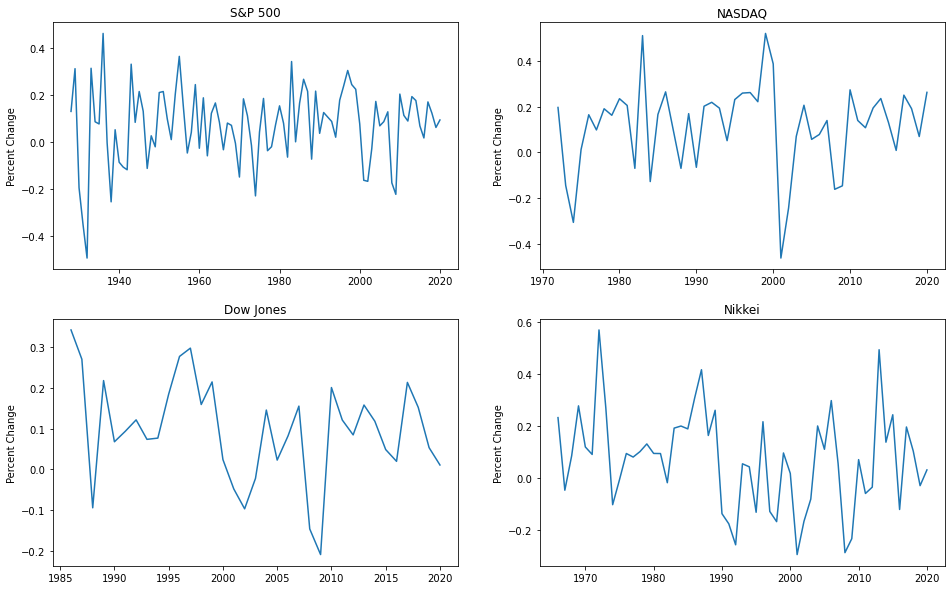

In [14]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))
ax[0][0].plot(df3['^GSPC'])
ax[0][0].set(title = 'S&P 500')
ax[0][0].set_ylabel('Percent Change')

ax[0][1].plot(df3['^IXIC'])
ax[0][1].set(title = 'NASDAQ')
ax[0][1].set_ylabel('Percent Change')

ax[1][0].plot(df3['^DJI'])
ax[1][0].set(title = 'Dow Jones')
ax[1][0].set_ylabel('Percent Change')

ax[1][1].plot(df3['^N225'])
ax[1][1].set(title = 'Nikkei')
ax[1][1].set_ylabel('Percent Change')

# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/tennis.csv')
df['dftpt'] = df['player1 double faults'] / df['player1 total points total']
df

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win,dftpt
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False,0.019417
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True,0.000000
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True,0.020270
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0,False,0.046154
4,1998,"Geneva, Switzerland",1998-08-24,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,2012,"Australian Open, Australia",2012-01-16,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",S,...,16.0,21.0,95.0,141.0,51.0,135.0,146.0,276.0,False,0.018116
1175,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R32,...,0.0,8.0,22.0,45.0,9.0,41.0,31.0,86.0,True,0.000000
1176,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R16,...,2.0,9.0,28.0,50.0,11.0,49.0,39.0,99.0,True,0.000000
1177,2012,"Doha, Qatar",2012-01-02,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",Q,...,9.0,16.0,47.0,78.0,34.0,95.0,81.0,173.0,True,0.011561


[Text(0.5, 1.0, 'Outdoor: Grass')]

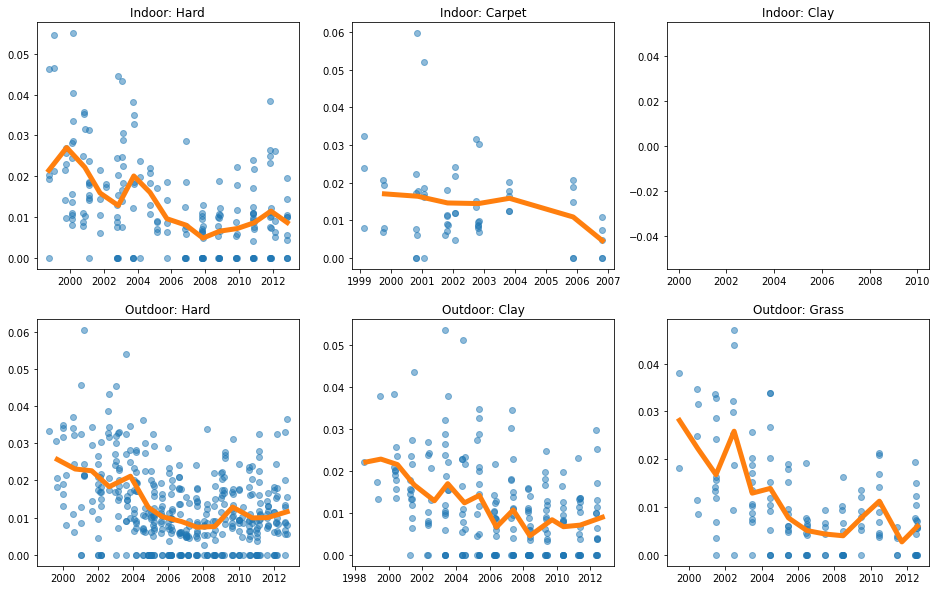

In [6]:
year_start = df.groupby('year')['start date'].max()
year_ratio = df.groupby('year')['dftpt'].mean()
plot1 = df[df['surface'] == 'Indoor: Hard']
plot2 = df[df['surface'] == 'Indoor: Carpet']
plot3 = df[df['surface'] == 'Indoor: Clay']
plot4 = df[df['surface'] == 'Outdoor: Hard']
plot5 = df[df['surface'] == 'Outdoor: Clay']
plot6 = df[df['surface'] == 'Outdoor: Grass']

fig, ax = plt.subplots(2, 3, figsize = (16, 10))

ax[0][0].plot_date(pd.to_datetime(plot1['start date']), plot1['dftpt'], alpha = 0.5)
year_start = plot1.groupby('year')['start date'].max()
year_ratio = plot1.groupby('year')['dftpt'].mean()
ax[0][0].plot_date(pd.to_datetime(year_start), year_ratio, '-', lw = 5)
ax[0][0].set(title = 'Indoor: Hard')

ax[0][1].plot_date(pd.to_datetime(plot2['start date']), plot2['dftpt'], alpha = 0.5)
year_start = plot2.groupby('year')['start date'].max()
year_ratio = plot2.groupby('year')['dftpt'].mean()
ax[0][1].plot_date(pd.to_datetime(year_start), year_ratio, '-', lw = 5)
ax[0][1].set(title = 'Indoor: Carpet')

ax[0][2].plot_date(pd.to_datetime(plot3['start date']), plot3['dftpt'], alpha = 0.5)
year_start = plot3.groupby('year')['start date'].max()
year_ratio = plot3.groupby('year')['dftpt'].mean()
ax[0][2].plot_date(pd.to_datetime(year_start), year_ratio, '-', lw = 5)
ax[0][2].set(title = 'Indoor: Clay')

ax[1][0].plot_date(pd.to_datetime(plot4['start date']), plot4['dftpt'], alpha = 0.5)
year_start = plot4.groupby('year')['start date'].max()
year_ratio = plot4.groupby('year')['dftpt'].mean()
ax[1][0].plot_date(pd.to_datetime(year_start), year_ratio, '-', lw = 5)
ax[1][0].set(title = 'Outdoor: Hard')

ax[1][1].plot_date(pd.to_datetime(plot5['start date']), plot5['dftpt'], alpha = 0.5)
year_start = plot5.groupby('year')['start date'].max()
year_ratio = plot5.groupby('year')['dftpt'].mean()
ax[1][1].plot_date(pd.to_datetime(year_start), year_ratio, '-', lw = 5)
ax[1][1].set(title = 'Outdoor: Clay')

ax[1][2].plot_date(pd.to_datetime(plot6['start date']), plot6['dftpt'], alpha = 0.5)
year_start = plot6.groupby('year')['start date'].max()
year_ratio = plot6.groupby('year')['dftpt'].mean()
ax[1][2].plot_date(pd.to_datetime(year_start), year_ratio, '-', lw = 5)
ax[1][2].set(title = 'Outdoor: Grass')